# 7.4. Estimating the correlation between two variables with a contingency table and a chi-square test

1. Let's import NumPy, Pandas, SciPy.stats and matplotlib.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

2. We load the dataset corresponding to Roger Federer.

In [2]:
df = pd.read_csv('./data/Roger-Federer.csv')

In [5]:
df.head()

year           tournament  start date type        surface      draw  \
0  1998   Basel, Switzerland  05.10.1998   WS   Indoor: Hard  Draw: 32   
1  1998     Toulouse, France  28.09.1998   WS   Indoor: Hard  Draw: 32   
2  1998     Toulouse, France  28.09.1998   WS   Indoor: Hard  Draw: 32   
3  1998     Toulouse, France  28.09.1998   WS   Indoor: Hard  Draw: 32   
4  1998  Geneva, Switzerland  24.08.1998   CH  Outdoor: Clay  Draw: 32   

  atp points  atp ranking tournament prize money round  \
0          1        396.0                 $9,800   R32   
1         59        878.0                $10,800   R32   
2         59        878.0                $10,800   R16   
3         59        878.0                $10,800     Q   
4          1        680.0                   $520   R32   

             ...             player2 2nd serve return points total  \
0            ...                                              22.0   
1            ...                                              19.0   
2            ...                                              30.0   
3            ...                                              28.0   
4            ...                                               NaN   

  player2 break points converted won player2 break points converted total  \
0                                4.0                                  8.0   
1                                0.0                                  1.0   
2                                0.0                                  4.0   
3                                3.0                                 10.0   
4                                NaN                                  NaN   

  player2 return games played player2 total service points won  \
0                         8.0                             36.0   
1                         8.0                             33.0   
2                        10.0                             46.0   
3                        10.0                             44.0   
4                         NaN                              NaN   

  player2 total service points total  player2 total return points won  \
0                               50.0                             26.0   
1                               65.0                              8.0   
2                               75.0                             23.0   
3                               63.0                             26.0   
4                                NaN                              NaN   

  player2 total return points total player2 total points won  \
0                              53.0                     62.0   
1                              41.0                     41.0   
2                              73.0                     69.0   
3                              67.0                     70.0   
4                               NaN                      NaN   

  player2 total points total  
0                      103.0  
1                      106.0  
2                      148.0  
3                      130.0  
4                        NaN  

[5 rows x 70 columns]

3. This is a particularly rich dataset. Each row corresponds to a match, and the 70 columns contain many player characteristics during that match.

In [9]:
print("Number of columns: " + str(len(df.columns)))
df[df.columns[:4]].tail()

Number of columns: 70


year                  tournament  start date type
1174  2012  Australian Open, Australia  16.01.2012   GS
1175  2012                 Doha, Qatar  02.01.2012  250
1176  2012                 Doha, Qatar  02.01.2012  250
1177  2012                 Doha, Qatar  02.01.2012  250
1178  2012                 Doha, Qatar  02.01.2012  250

4. Here, we only look at the proportion of points won, and the (relative) number of aces.

In [6]:
npoints = df['player1 total points total']
points = df['player1 total points won'] / npoints
aces = df['player1 aces'] / npoints

In [7]:
df[['player1 total points total', 'player1 total points won', 'player1 aces']].head()

player1 total points total  player1 total points won  player1 aces
0                       103.0                      41.0           4.0
1                       106.0                      65.0           8.0
2                       148.0                      79.0           8.0
3                       130.0                      60.0           3.0
4                         NaN                       NaN           NaN

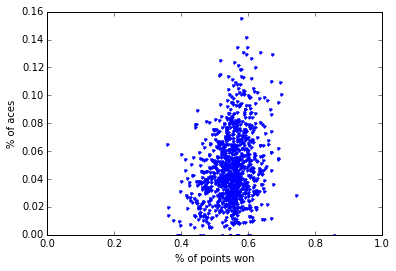

In [13]:
plt.plot(points, aces, '.');
plt.xlabel('% of points won');
plt.ylabel('% of aces');
plt.xlim(0., 1.);
plt.ylim(0.);

If the two variables were independent, we would not see any trend in the cloud of points. On this plot, it is a bit hard to tell. Let's use Pandas to compute a coefficient correlation.

5. We create a new `DataFrame` with only those fields (note that this step is not compulsory). We also remove the rows where one field is missing.

In [8]:
df_bis = pd.DataFrame({'points': points,
                       'aces': aces}).dropna()
df_bis.tail()

aces    points
1173  0.024390  0.585366
1174  0.039855  0.471014
1175  0.046512  0.639535
1176  0.020202  0.606061
1177  0.069364  0.531792

6. Let's compute the Pearson's correlation coefficient between the relative number of aces in the match, and the number of points won.

In [9]:
df_bis.corr()

aces    points
aces    1.000000  0.255457
points  0.255457  1.000000

A correlation of ~0.26 seems to indicate a positive correlation between our two variables. In other words, the more aces in a match, the more points the player wins (which is not very surprising!).

7. Now, to determine if there is a *statistically significant* correlation between the variables, we use a **chi-square test of independence of variables in a contingency table**.
8. First, we need to get binary variables (here, whether the number of points won or the number of aces is greater than their medians). For example, the value corresponding to the number of aces is True if the player is doing more aces than usual in a match, and False otherwise.

In [11]:
df_bis['result'] = df_bis['points'] > df_bis['points'].median()
df_bis['manyaces'] = df_bis['aces'] > df_bis['aces'].median()

In [12]:
df_bis.head()

aces    points result manyaces
0  0.038835  0.398058  False    False
1  0.075472  0.613208   True     True
2  0.054054  0.533784  False     True
3  0.023077  0.461538  False    False
5  0.007353  0.463235  False    False

9. Then, we create a **contingency table**, with the frequencies of all four possibilities (True & True, True & False, etc.).

In [13]:
pd.crosstab(df_bis['result'], df_bis['manyaces'])

manyaces  False  True 
result                
False       300    214
True        214    299

10. Finally, we compute the chi-square test statistic and the associated p-value. The null hypothesis is the independence between the variables. SciPy implements this test in `scipy.stats.chi2_contingency`, which returns several objects. We're interested in the second result, which is the p-value.

In [15]:
st.chi2_contingency(pd.crosstab(df_bis['result'], df_bis['manyaces']))

(27.809858855369555,
 1.3384233799633629e-07,
 1,
 array([[ 257.25024343,  256.74975657],
        [ 256.74975657,  256.25024343]]))

The p-value is much lower than 0.05, so we reject the null hypothesis and conclude that there is a statistically significant correlation between the proportion of aces and the proportion of points won in a match (for Roger Federer!).

As always, correlation does not imply causation... Here, it is likely that external factors influence both variables. (http://en.wikipedia.org/wiki/Correlation_does_not_imply_causation)